TP Final CoderHouse - NLP & Deep Learning  

Curso Data Science 3

Alumna : Daniela Dito

Dataset: News_Category_Dataset_v3 (Kaggle)

Consigna:

La Entrega Final constará de dos partes. Un mínimo requerido respecto a **NLP**.Deberás entregar un dataset del estilo texto (libro, paper, documento, colección de tweets, etc) donde se desarrollen de mínima dos de las tareas más usuales de preprocesamiento de NLP.

También un mínimo requerido de **Deep Learning** donde puedas construir tu primera red neuronal sencilla, lo que cubrirá la segunda actividad hacia la Entrega Final.

Para la Entrega Final deberás elegir una de las dos actividades y profundizar en el mismo, ya sea realizando un análisis de texto sobre la actividad de NLP o mejorando la red, vía adición de capas, en el de Deep Learning.

En este proyecto se aborda un flujo completo de procesamiento de lenguaje natural (NLP) y aprendizaje profundo (Deep Learning) utilizando el dataset News_Category_Dataset_v3 de Kaggle.

El objetivo principal es aplicar técnicas fundamentales de preprocesamiento de texto, exploración de datos y análisis de sentimiento, para luego construir una primera red neuronal recurrente que permita clasificar noticias en distintas categorías.

La notebook se encuentra organizada en secciones:

**Librerías**: instalación e importación de las herramientas necesarias.

**Carga del dataset**: lectura y concatenación del dataset en un único DataFrame para su análisis.

**Análisis exploratorio (EDA)**: exploración inicial del corpus de noticias con visualizaciones y generación de insights.

**Preprocesamiento NLP**: limpieza del texto, tokenización, lematización y normalización de datos.

**Análisis de sentimiento**: estimación de la polaridad de los textos como ejemplo de tarea de NLP.

**Red neuronal recurrente (LSTM)**: construcción y entrenamiento de un modelo básico de clasificación de noticias, que constituye el bloque de Deep Learning requerido en la consigna.

#1 Librerias

In [2]:
# Install a compatible numpy version first, then reinstall scipy and gensim
!pip install numpy==1.26.4
!pip install scipy gensim --upgrade --force-reinstall
!pip install transformers torch --upgrade
#!pip install textblob

  Using cached scipy-1.16.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.0 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 20.4 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.3
    Uninstalling wrapt-1.17.3:
      Succe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.1
    Uninstalling transformers-4.56.1:
      Successfully uninstalled transformers-4.56.1


In [1]:
# Importamos librerias
import pandas as pd
#!pip install ydata-profiling
#from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import os
import seaborn as sns

import re
import string
import nltk
import spacy
import zipfile
from spacy import displacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter # Importamos Counter desde collections
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS # Importamos WordCloud y STOPWORDS
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer   # herramienta de scikit-learn que transforma texto en una matriz numérica (bolsa de palabras).

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

#2 Carga del Dataset

In [ ]:
# Kaggle no da acceso directo a sus Datasets con una url, por lo tanto necesito usar su API para descargar
#!pip install kaggle

# Observo en que carpeta se descargo el archivo
#print(os.getcwd())

In [ ]:
# Reinstalo gdown
#!pip install gdown --force-reinstall

In [2]:
# OPCION DE CARGA 1: Directametne en VS con Tokens de Kaggle y API
#!kaggle datasets download -d rmisra/news-category-dataset -p ./datasets   # -p ./datasets → carpeta donde lo guarda


# OPCION 2 para disponibilizar Dataset a profesores de Coderhouse
!gdown --id 1IiIIuJAjbAVQwW3LQCvQFxKbTvSga041


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1IiIIuJAjbAVQwW3LQCvQFxKbTvSga041
From (redirected): https://drive.google.com/uc?id=1IiIIuJAjbAVQwW3LQCvQFxKbTvSga041&confirm=t&uuid=3f6a7f27-8ea2-40e1-aed2-7d97134fe677
To: /content/news-category-dataset.zip
100% 27.8M/27.8M [00:00<00:00, 46.8MB/s]


In [ ]:
# Verifico el contenido del directorio
# !dir

In [ ]:
# Opcion 1 acceso a Dataset en carpeta dataset/news
"""
import zipfile

# Ruta al archivo descargado
zip_path = "./datasets/news-category-dataset.zip"

# Descomprimir en carpeta "datasets/news"
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("./datasets/news")

# Cargar JSON en Pandas
df = pd.read_json("./datasets/news/News_Category_Dataset_v3.json", lines= True)
"""


'\nimport zipfile\n\n# Ruta al archivo descargado\nzip_path = "./datasets/news-category-dataset.zip"\n\n# Descomprimir en carpeta "datasets/news"\nwith zipfile.ZipFile(zip_path, "r") as zip_ref:\n    zip_ref.extractall("./datasets/news")\n\n# Cargar JSON en Pandas\ndf = pd.read_json("./datasets/news/News_Category_Dataset_v3.json", lines= True)\n'

In [3]:
# Opción 2: Acceso a Utilizar por profesores de Coderhouse
#import zipfile

# Ruta al archivo descargado
zip_path = "news-category-dataset.zip"

# Descomprimir en carpeta "datasets"
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("./datasets")

# Cargar JSON en Pandas
df = pd.read_json("./datasets/News_Category_Dataset_v3.json",
                  lines= True,   # Si no se pone lines=True, pandas intentaría leer todo el archivo como un único objeto JSON, lo cual fallaría en este caso.
                  chunksize=100000)  # solo 100000 chunks

Al usar chunksize no obtengo un dataframe, sino un iterador de chunks de pandas. df no es un DataFrame, es un JsonReader, que se comporta como un generador que devuelve DataFrames de a 100.000 filas.
Cuando usamos:

* `chunksize=100000` hace que **Pandas no cargue todo el dataset de una vez**.
* En su lugar devuelve un **iterador de DataFrames** (chunks), cada uno con \~100.000 filas.
* Para este dataset se generan 3 chunks:

  * 100.000 filas
  * 100.000 filas
  * 9.527 filas

Cada vez que hacés next(df) obtenés un DataFrame con 100.000 filas. **Ventaja de usar `chunksize`**: permite procesar archivos grandes **por partes**, evitando sobrecargar la memoria RAM.

In [4]:
# Convierto a Dataframe
dfs = []
for chunk in pd.read_json("./datasets/News_Category_Dataset_v3.json", lines=True, chunksize=100000):
    dfs.append(chunk)

# Unir todos los DataFrames en uno solo (Si queremos reconstruir el DataFrame completo, concatenamos los chunks)
df = pd.concat(dfs, ignore_index=True)

# Revisar
print(type(df))   # <class 'pandas.core.frame.DataFrame'>
print(df.shape)   # cantidad de filas y columnas
# Estructura del Dataset
print(f"El Dataset cuenta con {df.shape[0]} filas y {df.shape[1]} columnas.")


<class 'pandas.core.frame.DataFrame'>
(209527, 6)
El Dataset cuenta con 209527 filas y 6 columnas.


El archivo contiene **209.527 noticias** y **6 columnas** (`category`, `headline`, `authors`, `link`, `short_description`, `date`).


In [ ]:
df.describe(include='all')

,link,headline,category,short_description,authors,date
count,209527,209527,209527,209527,209527,209527
unique,209486,207996,42,187022,29169,NaN
top,https://www.huffingtonpost.comhttps://www.wash...,Sunday Roundup,POLITICS,,,NaN
freq,2,90,35602,19712,37418,NaN
mean,NaN,NaN,NaN,NaN,NaN,2015-04-30 00:44:14.344308736
min,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,2013-08-10 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,2015-03-16 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,2016-11-01 00:00:00
max,NaN,NaN,NaN,NaN,NaN,2022-09-23 00:00:00


In [ ]:
# Descripción general columnas numéricas del dataset
df.describe().style.set_properties(**{'background-color': '#F0F0F0',
                                    'color': '#222222',
                                    'border': '1.5px  solid black'})

,date
count,209527
mean,2015-04-30 00:44:14.344308736
min,2012-01-28 00:00:00
25%,2013-08-10 00:00:00
50%,2015-03-16 00:00:00
75%,2016-11-01 00:00:00
max,2022-09-23 00:00:00


#3 NLP

##Análisis Exploratorio (EDA)

In [ ]:
# Otra forma de ver los datos del df es a travéz de pandas profiling report

#df.profile_report()

# report = ProfileReport(df, title="Mi Reporte de Datos")   # Generar el reporte
# report.to_file("mi_reporte.html")                         # Guardar el reporte en un archivo HTML

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:56<00:00,  9.36s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: Couldn't find space to draw. Either the Canvas size is too small or too much of the image is masked out.

<Figure size 600x400 with 0 Axes>

In [ ]:
# # Visualizaciones en general

# def eda_visualizations(df, num_cols=None, cat_cols=None):
#     """
#     Genera un análisis visual exploratorio del DataFrame:
#     - Histogramas / distribuciones para variables numéricas
#     - Boxplots para variables numéricas agrupadas por categorías (si hay categóricas)
#     - Scatterplots entre pares de numéricas
#     - Heatmap de correlación de Pearson entre numéricas

#     Parámetros:
#     -----------
#     df : pd.DataFrame
#         DataFrame de entrada
#     num_cols : list, optional
#         Lista de columnas numéricas. Si es None, se detectan automáticamente.
#     cat_cols : list, optional
#         Lista de columnas categóricas. Si es None, se detectan automáticamente.
#     """

#     # Detectar columnas si no están definidas
#     if num_cols is None:
#         num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
#     if cat_cols is None:
#         cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

#     print("Variables numéricas:", num_cols)
#     print("Variables categóricas:", cat_cols)

#     # Distribuciones
#     for col in num_cols:
#         plt.figure(figsize=(6,4))
#         sns.histplot(df[col].dropna(), kde=True, bins=30, color="skyblue")
#         plt.title(f"Distribución de {col}")
#         plt.xlabel(col)
#         plt.ylabel("Frecuencia")
#         plt.show()

#     # Boxplots
#     if cat_cols:
#         for num in num_cols:
#             for cat in cat_cols:
#                 if df[cat].nunique() < 20:  # evitar categoricas con demasiados valores
#                     plt.figure(figsize=(10,5))
#                     sns.boxplot(x=cat, y=num, data=df, palette="Set2")
#                     plt.title(f"Boxplot de {num} por {cat}")
#                     plt.xticks(rotation=45)
#                     plt.show()


#     # Scatterplots

#     if len(num_cols) >= 2:
#         sns.pairplot(df[num_cols], diag_kind="kde")
#         plt.suptitle("Scatterplots entre variables numéricas", y=1.02)
#         plt.show()

#     # Heatmap de correlación de Pearson

#     if len(num_cols) > 1:
#         corr = df[num_cols].corr(method="pearson")
#         plt.figure(figsize=(8,6))
#         sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
#         plt.title("Matriz de correlación de Pearson")
#         plt.show()


In [ ]:
#eda_visualizations(df)


Variables numéricas: []
Variables categóricas: ['link', 'headline', 'category', 'short_description', 'authors']


Esa función de EDA (eda_visualizations) está pensada para datasets tabulares tradicionales estructurados donde tenemos variables numéricas y categóricas bien definidas. En cambio, en NLP, los datos son principalmente texto, y el texto necesita ser transformado en representaciones numéricas (longitud, frecuencia de palabras, embeddings) antes de poder visualizarse con histogramas, boxplots o correlaciones.

## Análisis Exploratorio de Datos (EDA) en NLP

Para entender la naturaleza del texto antes de aplicar modelos, analizaremos:

1. **Distribución de longitudes de texto (text_length)**: muestra cuántas palabras o caracteres tienen las oraciones/documentos.

2. **Distribución de clases (target = category)**: si el dataset está etiquetado, es importante revisar si las clases están balanceadas o si existe desbalance (clases poco representadas).

3. **Visualización de nubes de palabras WordCloud (nube de palabras)**: permite ver de manera visual las palabras más frecuentes en el corpus.

4. **Conteo de palabras más frecuentes (word frequencies, n-grams)**: gráfico de barras con las palabras más comunes.

5. **Análisis de stopwords y rarewords.**

6. **Matriz de co-ocurrencia de palabras** o heatmaps de correlación de términos.

7. **Embeddings reducidos con PCA/t-SNE/UMAP** para ver la estructura semántica.

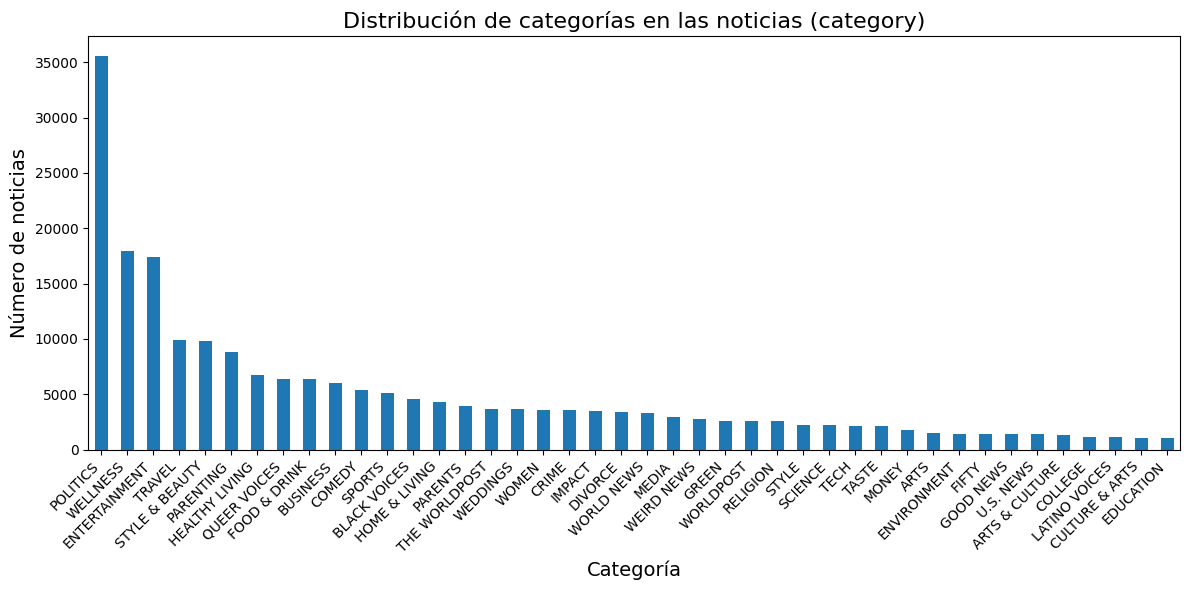

In [ ]:
# Insight 1: Distribución de categorías (feature category)

plt.figure(figsize=(12,6))
ax = df['category'].value_counts().plot(kind='bar')

# Títulos usando el objeto ax
ax.set_title("Distribución de categorías en las noticias (category)", fontsize=16)
ax.set_xlabel("Categoría", fontsize=14)      # etiqueta del eje X
ax.set_ylabel("Número de noticias", fontsize=14)

# Mejoras de ticks
plt.xticks(rotation=45, ha='right', fontsize=10)

# Ajustar layout para evitar recortes
plt.tight_layout()

plt.show()


In [ ]:
# Insight 1: Categoría más frecuente
print("Insight 1: La categoría más común es:", df["category"].value_counts().idxmax())

Insight 1: La categoría más común es: POLITICS


**Descripción:** El gráfico de barras muestra la distribución de noticias por categorías. En el eje horizontal están las categorías de noticias (Politics, Wellness, Entertainment, etc.) y en el eje vertical está la cantidad de noticias en cada categoría.


**Desbalance / asimetría a la izquierda**

Se observa que unas pocas categorías tienen muchas noticias, mientras que la mayoría tienen relativamente pocas. Por ejemplo, Politics tiene el mayor volumen, muy por encima de todas las demás.
Luego viene Wellness, Entertainment, Travel, Style & Beauty, Parenting, etc., con cantidades intermedias.

**Tipo de distribución:** *distribución muy sesgada hacia la izquierda:* muchas pocas categorías con valores altos, muchas con valores bajos (“long tail”). No es simétrica, ni uniforme.

**Interpretación / implicaciones:**

Para entrenar un modelo de clasificación, el desbalance de clases es un problema: el modelo podría sesgarse hacia las categorías con más ejemplos (Politics, etc.). Sería importante usar técnicas como re-muestreo (oversampling/undersampling), ponderaciones, data augmentation, o ajustar la métrica para tener en cuenta ese desbalance.


Longitud promedio de las descripciones: 19.66902594892305


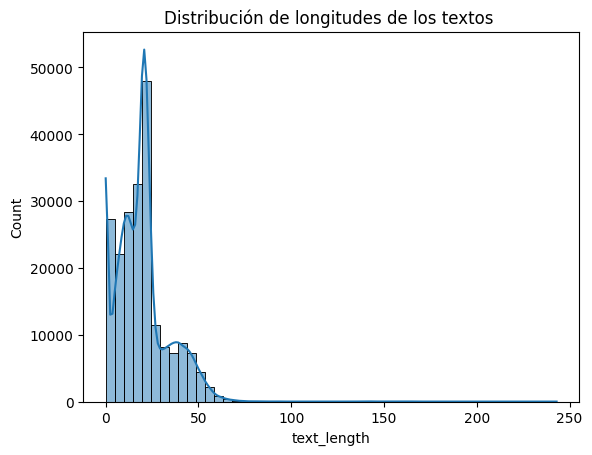

In [ ]:
# Insight 2: Longitud promedio de los textos
"""
Crea una columna con la cantidad de palabras en cada texto.
Calcula la media de esas longitudes.
Grafica un histograma con densidad para visualizar la distribución.
"""
df['text_length'] = df['short_description'].apply(lambda x: len(str(x).split()))  # agrego columna text_lenght
print("Longitud promedio de las descripciones:", df['text_length'].mean())

sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribución de longitudes de los textos ")
plt.show()

El gráfico (**histograma con una curva de densidad** (`kde=True`)) muestra la distribución de la longitud de los textos en la columna `short_description`, donde la longitud se mide por el número de palabras.

* **Eje X (`text_length`)**: Representa el número de palabras en cada descripción. Va desde casi 0 hasta 250 palabras.
* **Eje Y (`Count`)**: Indica la frecuencia (cuántas descripciones tienen una longitud determinada).

1.  **Concentración Principal**: La mayoría de las descripciones tienen una longitud relativamente corta. El pico más alto del histograma se encuentra **alrededor de las 20 a 30 palabras**, descripciones son concisas.

2.  **Dispersión**: La mayoría de los datos se agrupan en un rango corto, probablemente entre 10 y 50 palabras. La frecuencia de descripciones más largas (más de 50 palabras) disminuye drásticamente, lo que indica que **existen muy pocas descripciones extensas**.

3.  **Valor Atípico (Outliers)**: Aunque la mayoría de los textos son cortos, el histograma muestra una "cola" larga que se extiende hasta casi 250 palabras. Esto significa que **hay algunas descripciones excepcionalmente largas**, aunque son raras.

**Conclusión del Insight**

Este análisis nos dice que la mayoría de los textos en la columna `short_description` son **breves y estandarizados**. La longitud promedio está fuertemente influenciada por la alta concentración de textos cortos.

In [ ]:
 df.groupby("category")["text_length"].mean().sort_values(ascending=False).head(10)

,text_length
category,
FIFTY,33.656674
WELLNESS,30.904820
PARENTING,29.701172
EDUCATION,27.783037
MONEY,27.341686
TRAVEL,26.435657
IMPACT,26.082951
WEDDINGS,25.780728
DIVORCE,25.761529


In [ ]:
# Insight 3: Categoría con descripciones más largas

# Agrupa el DataFrame por categoría
longest_cat = df.groupby("category")["text_length"].mean().idxmax() # Calcula el promedio de long. de las descripciones por c/categoría y devuelve el índice.
longest_val = df.groupby("category")["text_length"].mean().max()

# Mostrar categoría + promedio
print(f"Insight 4: La categoría con descripciones más largas es: {longest_cat}, con un promedio de palabras de {longest_val:.2f}")


Insight 4: La categoría con descripciones más largas es: FIFTY, con un promedio de palabras de 33.66


In [ ]:
# Insight 4: Frecuencia de palabras.
#from wordcloud import WordCloud, STOPWORDS
#from collections import Counter

def eda_nlp(df, text_col="short_description", target_col="category", top_n=20):
    """
    Realiza un análisis exploratorio por Wodrcloud y frecuencia de palabras en un DataFrame de texto.

    Parámetros:
    df : pd.DataFrame
        DataFrame de entrada.
    text_col : str
    """
    #  WordCloud de todo el corpus SIN stopwords
    # -----------------------------
    text_data = " ".join(df[text_col].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400,
                          background_color="white",
                          stopwords=set(STOPWORDS),
                          max_words=100).generate(text_data)

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("WordCloud de descripciones")
    plt.show()


    #  Frecuencia de palabras ( ANALISIS DE STOPWORDS Y RAREWORDS)
    # -----------------------------
    all_words = text_data.lower().split()
    word_freq = Counter(all_words)
    common_words = word_freq.most_common(top_n)  # definido en las 20 más frecuentes
    words, counts = zip(*common_words)
    print("Palabras raras:", word_freq.most_common()[-10:])
    print("Palabras más comunes:", common_words)

    plt.figure(figsize=(10,5))
    sns.barplot(
              x=list(counts),
              y=list(words),
              hue=list(words),    # cada palabra es un "grupo"
              palette="viridis",
              dodge=False,        # para que no se dupliquen las barras
              legend=False        # para que no aparezca una leyenda redundante
          )

    plt.title(f"Top {top_n} palabras más frecuentes")
    plt.xlabel("Frecuencia")
    plt.ylabel("Palabra")
    plt.show()

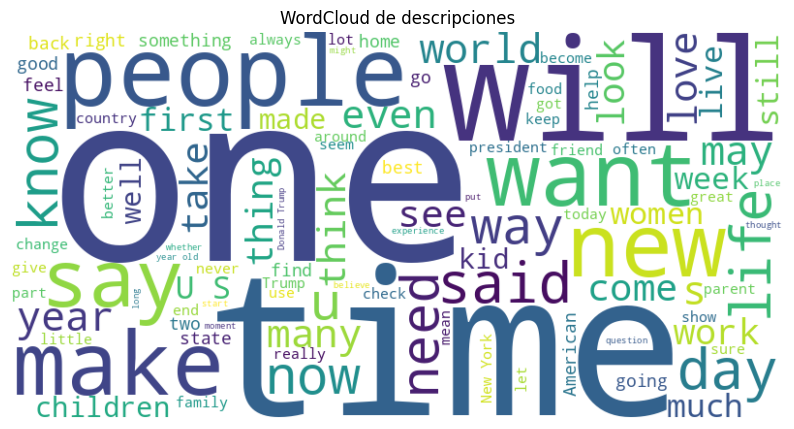

Palabras raras: [('powers-that-be', 1), ('"analysts', 1), ('"sony', 1), ('adjudged', 1), ('ellsworth', 1), ('sopa', 1), ('lte', 1), ('azarenka,', 1), ('sumyk,', 1), ('xlvi,', 1)]
Palabras más comunes: [('the', 208059), ('to', 117151), ('a', 104407), ('of', 99358), ('and', 97357), ('in', 67258), ('is', 49069), ('that', 43079), ('for', 40862), ('i', 31443), ('on', 31401), ('you', 31228), ('with', 27768), ('are', 26957), ('it', 26253), ('be', 22728), ('we', 22650), ('as', 21907), ('have', 20850), ('this', 20789)]


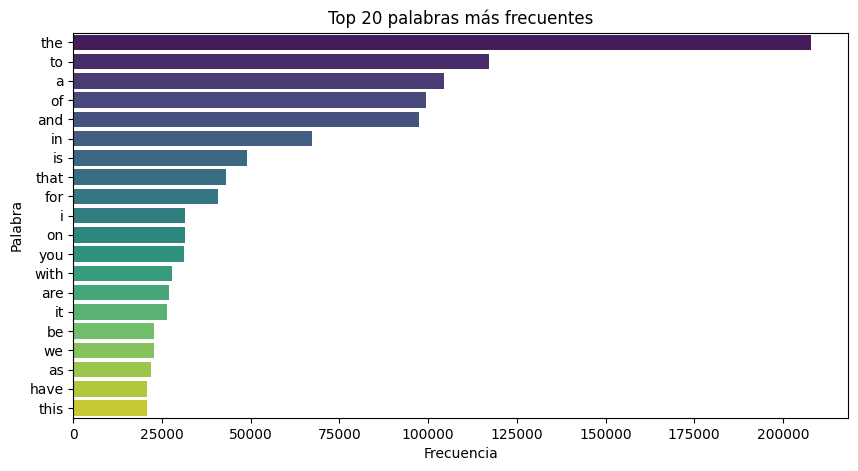

In [ ]:
eda_nlp(df)

Como era esperable, muestra que las 20 palabras más comunes son palabras de parada (en inglés: stop words). Se necesita un preprocesamiento adicional. Para obtener un insight real sobre los temas o el contenido de las descripciones, se deben eliminar estas palabras de parada y quizás también la puntuación y los números.

Observamos que dentro de rarewords incluye palabras con los signos de puntuación.

## Preprocesamiento


### NLTK

A continuación utilizamos la funcion limpiar_texto basada en  bibliotecas de Python **`nltk` (Natural Language Toolkit)** y **`re` (Expresiones Regulares)**.

* **`nltk`**: Se encarga de las tareas más avanzadas de procesamiento del lenguaje natural (NLP), como la **tokenización** (dividir el texto en palabras), la eliminación de **_stopwords_** y la **lematización** (reducir las palabras a su forma base).
* **`re`**: **expresiones regulares**,para eliminar caracteres especiales y puntuación.

1.  **Convierte a minúsculas**: Transforma todo el texto a minúsculas, asegurando que, por ejemplo, "Apple" y "apple" sean tratadas como la misma palabra.
2.  **Elimina caracteres especiales**: Elimina la puntuación, símbolos y números, dejando solo letras y espacios.
3.  **Tokeniza**: Divide el texto en una lista de palabras individuales.
4.  **Lematiza y elimina _stopwords_**: Recorre cada palabra de la lista. Si la palabra no es una _stopword_ (como "a", "an", "the"), la lematiza, es decir, la reduce a su forma raíz. Por ejemplo, "running" se convierte en "run".
5.  **Une las palabras**: Finalmente, junta las palabras limpias de nuevo en una sola cadena de texto.

In [5]:
# Función para limpiar texto con regex, pasar a minúsc., tokenizar y lematizar.
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()   # lematizador de NLTK

def limpiar_texto(texto):
    # 1. Pasar a minúsculas
    texto = texto.lower()
    # 2. Eliminar caracteres especiales
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    # 3. Eliminar etiquetas HTML
    text = re.sub(r'<.*?>', '', texto)
    # 4. Eliminar URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', texto)
    # 5. Eliminar puntuación
    # Usamos string.punctuation que contiene !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 6. Eliminar números
    text = re.sub(r'\d+', '', texto)
    # 7. Eliminar espacios en blanco extra
    text = re.sub(r'\s+', ' ', texto).strip()

    # Tokenizar
    tokens = nltk.word_tokenize(texto)              # tokenización

    # Eliminar stopwords y lematizar ( reducir a forma canónica o lema)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] # lista de palabras (tokens) lematizadas y sin stopwords.
    return " ".join(tokens)

df['clean_text'] = df['short_description'].astype(str).apply(limpiar_texto)       # NUeva columna con texto limpio
df[['short_description', 'clean_text']].head()

,short_description,clean_text
0,Health experts said it is too early to predict...,health expert said early predict whether deman...
1,He was subdued by passengers and crew when he ...,subdued passenger crew fled back aircraft conf...
2,"""Until you have a dog you don't understand wha...",dog dont understand could eaten
3,"""Accidentally put grown-up toothpaste on my to...",accidentally put grownup toothpaste toddler to...
4,Amy Cooper accused investment firm Franklin Te...,amy cooper accused investment firm franklin te...


NOTA: NO se realiza Stemming ( llevar la palabra a su raíz o stem ya que Lematizamos). Tanto Stemming como lematización son técnicas de normalización en el procesamiento de lenguaje natural (NLP) que se usan para reducir las palabras a una forma base. Lematización es más avanzada pero más costosa computacionalmente.


#### Nube de Palabras (Wordcloud) post limpieza

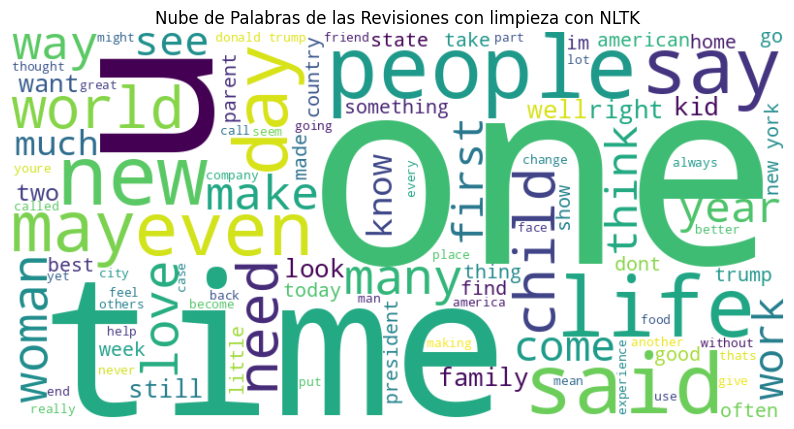

In [ ]:
# Unimos todo el texto en una sola cadena
text_corpus = " ".join(review for review in df['clean_text'])

# Generamos la nube de palabras
wordcloud = WordCloud(width=800, height=400,
                          background_color="white",
                          max_words=100).generate(text_corpus)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras de las Revisiones con limpieza con NLTK")
plt.show()

wordcloud.generate(text_corpus)



###Spacy

In [6]:
# # Cargar el modelo de spaCy para inglés. Es más eficiente que NLTK para esta tarea ('en_core_sm' es la versión pequeña)

# punctuations = string.punctuation        # Creamos una lista de signos de puntuación y stop words
# from spacy.lang.en import English
# nlp_en = English()
# stop_words = nlp_en.Defaults.stop_words


# try:
#     nlp = spacy.load("en_core_web_sm")   #  carga el modelo pre-entrenado para inglés, incluye la lematización y la lista de stopwords en inglés.
# except OSError:
#     print("Downloading 'en_core_web_sm' model for spaCy...")
#     from spacy.cli import download
#     download("en_core_web_sm")
#     nlp = spacy.load("en_core_web_sm")

# def limpiar_texto_spacy(texto):   # Función de preprocesamiento usando SpaCy

#      # 1. Crear un objeto Doc de SpaCy
#     doc = nlp(texto)

#     # 2. Lematizar, convertir a minúsculas y eliminar stop words y puntuación
#     filtered_tokens = []
#     for token in doc:
#         # Si el token no es una stop word ni un signo de puntuación
#         if not token.is_stop and not token.is_punct:
#             # Lematizamos y convertimos a minúsculas
#             filtered_tokens.append(token.lemma_.lower())

#     # 3. Unir los tokens de nuevo en una cadena de texto
#     return " ".join(filtered_tokens)

In [7]:
# # Llamamos a la función  OJOOOOOOOO COMPUTACIONALMENTE ES LA MUERTE..USE UN MOD. "MD" MEDIANO
# df['clean_text_spacy'] = df['short_description'].astype(str).apply(limpiar_texto_spacy)  # Aplicamos la función a nuestra columna de texto
# print(df[['short_description', 'clean_text_spacy']].head())

KeyboardInterrupt: 

In [9]:
# Cargar el modelo una sola vez
try:
    nlp = spacy.load("en_core_web_md", isable=["ner", "parser"])  #  desactivamos NER y parser para que no sea computacionalm. tan costoso
except OSError:
    from spacy.cli import download
    download("en_core_web_md")
    nlp = spacy.load("en_core_web_md", disable=["ner"])

def limpiar_doc(doc):
    return " ".join(
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct
    )

# Procesamiento en batch usando pipe
texts = df['short_description'].astype(str).tolist()
cleaned = []

for doc in nlp.pipe(texts, batch_size=1000, n_process=-1):  # n_process=-1 usa todos los cores disponibles
    cleaned.append(limpiar_doc(doc))

df['clean_text_spacy'] = cleaned

print(df[['short_description', 'clean_text_spacy']].head())


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
                                   short_description  \
0  Health experts said it is too early to predict...   
1  He was subdued by passengers and crew when he ...   
2  "Until you have a dog you don't understand wha...   
3  "Accidentally put grown-up toothpaste on my to...   
4  Amy Cooper accused investment firm Franklin Te...   

                                    clean_text_spacy  
0  health expert say early predict demand match 1...  
1  subdue passenger crew flee aircraft confrontat...  
2                                 dog understand eat  
3  accidentally grow toothpaste toddler toothbrus...  
4  amy cooper accuse investment firm franklin tem...

In [10]:
print("\nEjemplo de preprocesamiento:")
print("Texto Original:\n", df['short_description'].iloc[2])
print("\nTexto Procesado:\n", df['clean_text_spacy'].iloc[2])


Ejemplo de preprocesamiento:
Texto Original:
 "Until you have a dog you don't understand what could be eaten."

Texto Procesado:
 dog understand eat


#### Matríz de co-ocurrencia de palabras

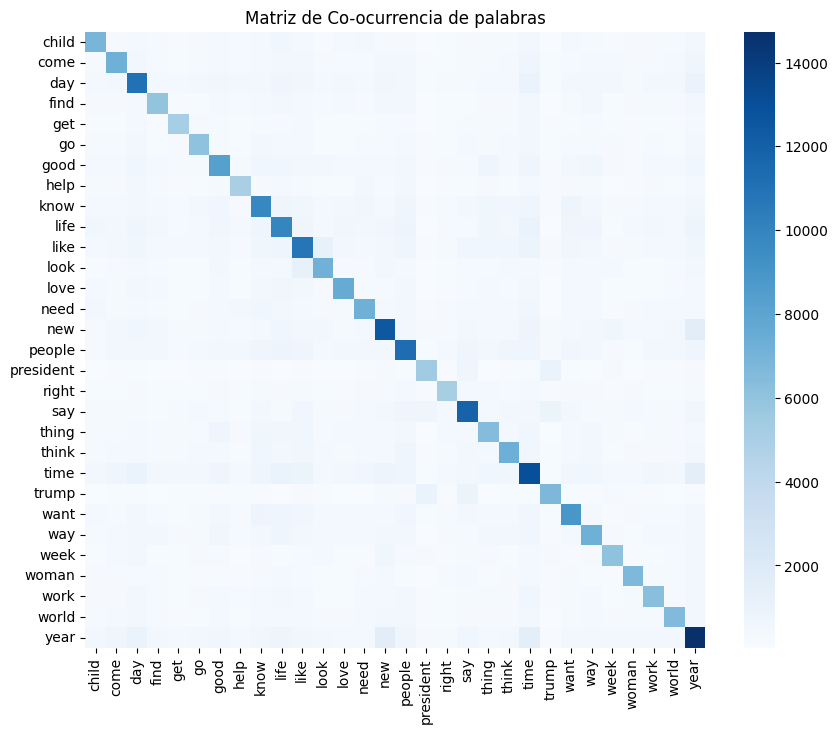

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=30)
X = vectorizer.fit_transform(df['clean_text_spacy'])
co_occurrence = (X.T * X).toarray()

plt.figure(figsize=(10,8))
sns.heatmap(co_occurrence, xticklabels=vectorizer.get_feature_names_out(),
            yticklabels=vectorizer.get_feature_names_out(),
            cmap="Blues", annot=False)
plt.title("Matriz de Co-ocurrencia de palabras")
plt.show()


## VECTORIZACIÓN: Convertimos tokens a Vectores.


#### Análisis de Sentimiento: Limpieza con NLTK + TextBlob

Como este dataset no tiene etiquetas de sentimiento, solo categorías temáticas (como POLITICS, ENTERTAINMENT, etc.), para aplicar análisis de sentimiento usamos directamente un analizador pre-entrenado como TextBlob.

In [ ]:
#from textblob import TextBlob

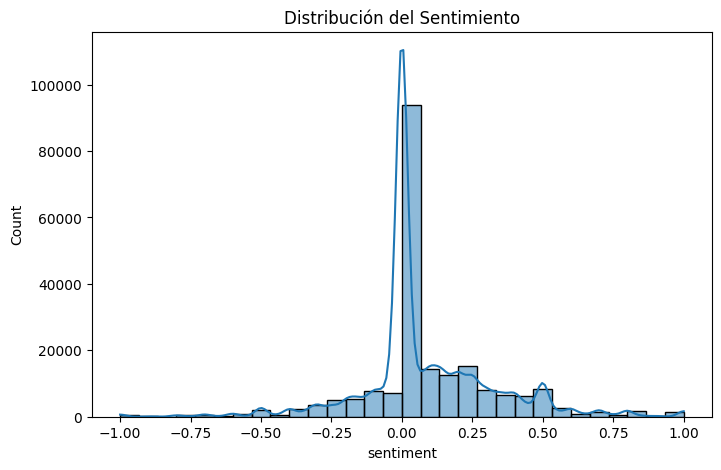

                                   short_description  sentiment
0  Health experts said it is too early to predict...   0.118182
1  He was subdued by passengers and crew when he ...   0.000000
2  "Until you have a dog you don't understand wha...   0.000000
3  "Accidentally put grown-up toothpaste on my to...   0.000000
4  Amy Cooper accused investment firm Franklin Te...  -0.233333


In [17]:
#TextBlob es una librería de Python de alto nivel que simplifica las tareas comunes del Procesamiento del Lenguaje Natural (NLP).
# Análisis de Sentimiento: Determina si una pieza de texto es positiva, negativa o neutral, asignando un valor de polaridad y subjetividad.

def obtener_sentimiento(texto):
    return TextBlob(texto).sentiment.polarity               # TEXTBLOB-->Polaridad: 1 Positiva, -1 Negativa
                                                            # Subjetividad: "0"( objetivo,un hecho), "1" (subjetivo, una opinion)

df['sentiment'] = df['clean_text'].apply(obtener_sentimiento)    # método .apply() de pandas para aplicar la función obtener_sentimiento a c/fila de la columna 'clean_text'. El resultado (la polaridad de cada texto) se guarda en una nueva columna llamada 'sentiment'.

plt.figure(figsize=(8,5))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Distribución del Sentimiento")
plt.show()

print(df[['short_description', 'sentiment']].head())

El eje X representa la **polaridad del sentimiento** (de -1.0 a 1.0) y el eje Y, el recuento o la frecuencia de los textos que caen en ese rango.

Predominio de la neutralidad: La característica más notable es el pico central extremadamente alto. Esto indica que una gran mayoría de los textos analizados tienen una polaridad de sentimiento cercana a cero (0.0), su tono es neutral. Esto es común en textos que son puramente informativos o que no expresan una opinión fuerte.

Sesgo positivo: Aunque la neutralidad domina, la distribución de los textos positivos (valores a la derecha del 0) es más amplia y tiene una frecuencia mayor que la de los textos negativos. Hay una "cola" más larga y una mayor cantidad de barras en el rango de 0.25 a 0.75, lo que sugiere que hay más textos con un sentimiento moderadamente positivo que textos con un sentimiento moderadamente negativo.

Baja cantidad de textos extremos: Tanto los sentimientos extremadamente positivos (cerca de 1.0) como los extremadamente negativos (cerca de -1.0) son muy poco frecuentes. Las barras en los extremos del gráfico son muy bajas, lo que indica que pocos textos expresan un sentimiento muy fuerte.

En resumen, el gráfico revela que la mayoría de los textos no expresan un sentimiento claro. De aquellos que sí lo hacen, hay un ligero predominio de opiniones positivas sobre las negativas, aunque las opiniones muy fuertes son raras.


--- Conteo de Categorías de Sentimiento ---
Polarity
Neutro      116440
Positivo     69961
Negativo     23126
Name: count, dtype: int64


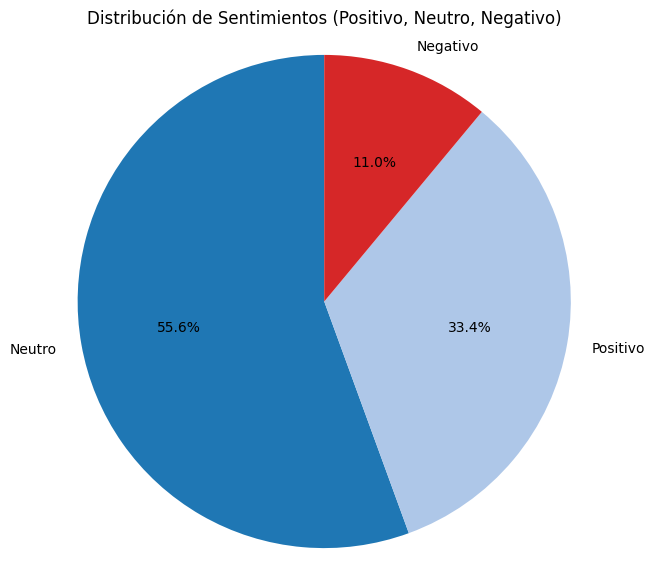


--- Vista previa del DataFrame mejorado ---
                                   short_description  sentiment  Polarity
0  Health experts said it is too early to predict...   0.118182  Positivo
1  He was subdued by passengers and crew when he ...   0.000000    Neutro
2  "Until you have a dog you don't understand wha...   0.000000    Neutro
3  "Accidentally put grown-up toothpaste on my to...   0.000000    Neutro
4  Amy Cooper accused investment firm Franklin Te...  -0.233333  Negativo


In [18]:
#  Crear la columna 'Polarity' con categorías
def clasificar_polaridad(score):
    """
    Clasifica un puntaje de polaridad en 'Positivo', 'Neutro' o 'Negativo'.
    """
    if score > 0.1:
        return 'Positivo'
    elif score < -0.1:
        return 'Negativo'
    else:
        return 'Neutro'

df['Polarity'] = df['sentiment'].apply(clasificar_polaridad)

#  Conteo de valores de la nueva columna 'Polarity' ---
print("\n--- Conteo de Categorías de Sentimiento ---")
print(df['Polarity'].value_counts())

# Visualización con un gráfico de torta ---
polarity_counts = df['Polarity'].value_counts()            # Obtener los conteos para el gráfico
labels = polarity_counts.index
sizes = polarity_counts.values

# Crear el gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#1F77B4', '#AEC7E8', '#D62728'])
plt.title("Distribución de Sentimientos (Positivo, Neutro, Negativo)")
plt.axis('equal')  # Asegura que el círculo sea perfecto
plt.show()

# Mostrar las primeras filas con las nuevas columnas ---
print("\n--- Vista previa del DataFrame mejorado ---")
print(df[['short_description', 'sentiment', 'Polarity']].head())

* **Predominio de la neutralidad:** El hallazgo más significativo es que la mayoría de los textos (el **55.6%**) tiene un sentimiento **neutro**. Esto es común en textos informativos, descripciones o datos sin una carga emocional.

* **Sentimiento positivo en segundo lugar:** La segunda categoría más grande es el sentimiento **positivo**, que representa un **33.4%**.


#### Análisis de Sentimiento: Limpieza con SPACY + WordEmbbeddings

Word Embeddings: El Algoritmo de Vectorización (Vectores de SpaCy)

Ahora analizaremos el texto utilizando Word Embeddings (como Word2Vec, GloVe o FastText), que es un método fundamental en el NLP moderno para vectorizar o generar las representaciones numéricas que alimentarán a nuestro modelo de Machine Learning. (algoritmo de representación cuyo objetivo es convertir el texto limpio en un formato que el modelo de Machine Learning pueda procesar.)

A diferencia de métodos tradicionales como BoW o TF-IDF, que crean vectores dispersos basados en la frecuencia de las palabras, los Word Embeddings (incrustaciones de palabras) generan vectores densos de baja dimensión que capturan el significado semántico y las relaciones contextuales entre las palabras.

Pasos:

1. Vectorizar el texto usando Word Embeddings.

2. Entrenar un modelo de clasificación (Regresión Logística) con esos vectores, usando una columna de sentimiento ya etiquetada (y_train).

3. Predecir el sentimiento usando ese modelo entrenado.

In [12]:
# Ahora, como ya hemos limpiado los textos, usaremos esta columna clean_text_spacy en lugar de la columna original.
# Para vectorizar: Word2Vec técnica de embeddings

#from gensim.models import Word2Vec
import numpy as np

# Tokenizar el texto limpio (ya hemos hecho un paso de tokenización con spaCy)
df['tokenized_clean_text'] = df['clean_text_spacy'].apply(lambda x: x.split())

# Entrenar el modelo Word2Vec
model_w2v = Word2Vec(df['tokenized_clean_text'],
                     vector_size=100,
                     window=5,
                     min_count=1,
                     workers=4)

# Convertir cada texto en un vector promediado
def vectorize_text(tokens, model):
    vec = np.zeros(100)  # 100 es el tamaño del vector
    count = 0
    for word in tokens:
        if word in model.wv:        #  vectorizar: Word2Vec técnica de embeddings
            vec += model.wv[word]
            count += 1
    return vec / count if count > 0 else vec

# Aplicar la vectorización con el modelo entrenado
df['vectorized_text'] = df['tokenized_clean_text'].apply(lambda x: vectorize_text(x, model_w2v))



#### Visualización de dependencias gramaticales (Entidades Nombradas)

In [13]:
# # Visualizar un texto limpio con Displacy ---
# texto_a_visualizar = df['clean_text_spacy'][0]     # Selecciona el primer texto limpio para visualizar

# # Procesa el texto limpio con spaCy nuevamente para obtener un objeto 'doc'
# # Nota: La visualización de dependencias será menos útil después de la limpieza ya que eliminamos las palabras que definen la estructura gramatical.
# # Sin embargo, la de entidades puede seguir siendo relevante.
# doc_limpio = nlp(texto_a_visualizar)




In [ ]:
# # Visualiza las entidades (personas, lugares, organizaciones, etc.)--> etiquetado de las entidades.
# print("Visualización de entidades nombradas del texto limpio:")
# displacy.render(doc_limpio, style="ent", jupyter=True)

# # Visualiza las dependencias gramaticales del texto limpio
# print("\nVisualización de dependencias gramaticales del texto limpio:")
# displacy.render(doc_limpio, style="dep", jupyter=True)

In [15]:
# # Extraer de la primer fila, entidades compuestas a partir de la información de dependencias sintácticas del grafo:
# doc_limpio = nlp(texto_a_visualizar)

# entities = []

# for token in doc_limpio:
#     # Buscar sustantivos principales
#     if token.pos_ in ["NOUN"]:
#         # Tomar el núcleo y sus modificadores (izquierda + derecha)
#         modifiers = [tok.text for tok in token.lefts if tok.dep_ in ["compound", "amod", "nummod"]]
#         phrase = " ".join(modifiers + [token.text])
#         entities.append(phrase)

# print("Entidades compuestas encontradas:", entities)


Entidades compuestas encontradas: ['health', 'health expert', 'demand', 'million dose new booster', 'u.s . order']


In [16]:
# texto_a_visualizar   # Primer oración unicamente (limpia)

'health expert say early predict demand match 171 million dose new booster u.s. order fall'

Obtención de Entidades Compuestas en NLP:
 **unidades léxicas complejas** formadas por un sustantivo núcleo y sus modificadores (numéricos, adjetivos o compuestos).  
 ¿Para qué sirve extraerlas?

1. **Mejorar la representación del texto**  
   - Capturan significados más precisos que las palabras sueltas.  
   - Evitan pérdida de contexto (ej. *“booster order”* ≠ *booster* + *order* por separado).  

2. **Enriquecer el Análisis de Frecuencia**  
   - Permite estudiar la ocurrencia de términos relevantes en lugar de palabras comunes.  

3. **Extracción de información estructurada**  
   - Ayuda a identificar actores, objetos o eventos clave dentro de un corpus  

4. **Mejorar modelos de clasificación o clustering**  
   - Usar entidades compuestas como features puede dar señales más discriminativas.  

5. **Apoyo a tareas de NER (Named Entity Recognition)**  
   - Se pueden complementar las entidades reconocidas automáticamente   

6. **Facilitar búsquedas y recuperación de información (IR / RAG)**  

✅ **En resumen**: la extracción de entidades compuestas convierte texto crudo en unidades semánticas más ricas y significativas, lo que mejora tanto el análisis exploratorio como el rendimiento de modelos de NLP en clasificación, clustering, extracción de información y búsqueda.  


## Regresión Logistica

Ahora que tenemos nuestro texto limpio y nuestras etiquetas binarias, podemos entrenar un modelo de clasificación.

Variables:

Variable Independiente (X): df['clean_text']

Variable Dependiente (y): df['sentiment']

Compararemos 2 metodologías de vectorización, TF-IDF y WordEmbbeddings usando siempre la Regresión Logística como clasificador para poder comparar los resultados de manera justa.

### REG. LOG con TextBlob

---



**Comparativa: TextBlob vs Word2Vec**

**TextBlob:**

No vectoriza el texto.

Devuelve un puntaje de sentimiento (polarity y subjectivity) para cada texto.

Más sencillo y rápido, pero no captura las relaciones semánticas profundas entre las palabras.

No es necesario entrenar un modelo para obtener el sentimiento.

**Word2Vec:**

Vectoriza el texto convirtiéndolo en vectores numéricos.

Permite entrenar un modelo de clasificación (como Regresión Logística) usando estos vectores.

Captura relaciones semánticas entre palabras (por ejemplo, "rey" y "reina" estarán cerca en el espacio vectorial).

Requiere más trabajo y procesamiento, pero ofrece más flexibilidad y potencial para tareas complejas.

**¿Qué enfoque elegir?**

Si solo necesitas determinar el sentimiento de un texto y no estás buscando representaciones vectoriales avanzadas, TextBlob es una opción rápida y sencilla. Funciona bien para tareas de análisis de sentimiento básico.

Si necesitas vectorizar el texto para entrenar modelos de clasificación o si tu objetivo es capturar relaciones semánticas más profundas (como en modelos de NLP más complejos), entonces debes usar técnicas de vectorización como Word2Vec, GloVe o BERT.

AL usar TextBlob, ya no necesitas vectorizar el texto ni entrenar Word2Vec, pero sí podemos usar su resultado como input para una Regresión Logística para poder comparar.

TextBlob nos da valores por cada texto:

polarity: valor entre -1 (negativo) y 1 (positivo).

subjectivity: valor entre 0 (objetivo) y 1 (subjetivo).

Estos valores son números, y por tanto, pueden ser usados como características (features) para un modelo de clasificación:

*Usar polarity y subjectivity de TextBlob como features.

*Usar sentimiento como target (y_train).

Como ya :

✔️ Preprocesamos el texto

✔️ Calculamos la polaridad con TextBlob

✔️ Clasificamos esa polaridad en etiquetas (Positivo, Negativo, Neutro)

✔️ Visualizamos la distribución

Ahora, lo único que falta es entrenar un modelo de Regresión Logística usando la polaridad como feature y la etiqueta Polarity como objetivo (y_train)


In [19]:
# Entrenar modelo de Regresión Logística con polaridad de TextBlob
# Paso 1: Codificar las etiquetas (Polarity)

# Convertir las categorías ('Positivo', etc.) a números
label_encoder = LabelEncoder()
df['Polarity_encoded'] = label_encoder.fit_transform(df['Polarity'])

# Ejemplo: {'Negativo': 0, 'Neutro': 1, 'Positivo': 2}
print("Clases codificadas:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Clases codificadas: {'Negativo': 0, 'Neutro': 1, 'Positivo': 2}


In [20]:
#Paso 2: Preparar X (features) e y (target)

#X = columna 'sentiment' → contiene los valores de polaridad
#y = columna 'Polarity_encoded' → contiene las etiquetas numéricas

# Reshape porque es una sola feature
X_tb = df['sentiment'].values.reshape(-1, 1)
y_tb = df['Polarity_encoded'].values


In [21]:
# Paso 3: Separar entrenamiento y prueba

X_train_tb, X_test_tb, y_train_tb, y_test_tb = train_test_split(X_tb, y_tb, test_size=0.2, random_state=42)


In [22]:
# Paso 4: Entrenar el modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression

modelo_rl_tb = LogisticRegression(multi_class='multinomial', solver='lbfgs')
modelo_rl_tb.fit(X_train_tb, y_train_tb)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [23]:
# Paso 5: Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report

y_pred_tb = modelo_rl_tb.predict(X_test_tb)

print("Accuracy:", accuracy_score(y_test_tb, y_pred_tb))
print("\nReporte de Clasificación:\n", classification_report(y_test_tb, y_pred_tb, target_names=label_encoder.classes_))

Accuracy: 0.9917195628310982

Reporte de Clasificación:
               precision    recall  f1-score   support

    Negativo       1.00      0.97      0.98      4554
      Neutro       0.99      1.00      0.99     23285
    Positivo       1.00      0.99      0.99     14067

    accuracy                           0.99     41906
   macro avg       1.00      0.98      0.99     41906
weighted avg       0.99      0.99      0.99     41906



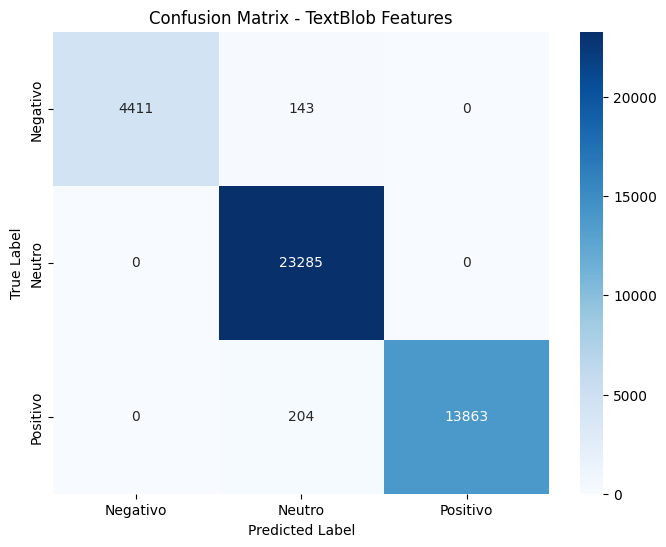

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test_tb, y_pred_tb)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - TextBlob Features')
plt.show()

In [25]:
# Paso6: Funcion para predecir nuevo texto

def predecir_sentimiento_reglog(texto, modelo, encoder):
    polaridad = TextBlob(texto).sentiment.polarity
    pred = modelo.predict([[polaridad]])
    etiqueta = encoder.inverse_transform(pred)
    return etiqueta[0]

# Ejemplo:
nuevo_texto = "This product is absolutely fantastic!"
resultado_tb = predecir_sentimiento_reglog(nuevo_texto, modelo_rl_tb, label_encoder)
print(f"Sentimiento predicho: {resultado_tb}")


Sentimiento predicho: Positivo


### Análisis de sentimiento con transformers Hugging FAce

Usaremos un modelo de 🤗 Hugging Face Transformers, específicamente uno ya entrenado para análisis de sentimiento, por ejemplo:

Modelo: cardiffnlp/twitter-roberta-base-sentiment

Etiquetas: 'negative', 'neutral', 'positive'

No requiere entrenamiento, solo inferencia

Pasos:

✔️ modelo BERT para etiquetar automáticamente muestra del dataset con sentimientos

✔️ Entrenar un modelo supervisado (Regresión Logística) con esas etiquetas

✔️ predecir sentimiento en nuevos textos

In [26]:
# Modelo preentrenado de análisis de sentimiento
model_name = "cardiffnlp/twitter-roberta-base-sentiment"

# Cargar tokenizer y modelo
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Crear pipeline de sentimiento
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Device set to use cuda:0


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [28]:
# Elegimos una columna de texto, por ejemplo "short_description"
"""Nota: No limpiar con spaCy antes de pasar a BERT → BERT necesita el contexto original.
Modelos como cardiffnlp/twitter-roberta-base-sentiment fueron entrenados con texto natural, no con texto lematizado, ni sin stopwords, ni sin mayúsculas.
BERT necesita contexto completo, incluyendo stopwords y estructura gramatical, por ende no usar columnas ya limpias como df[['clean_text_spacy']
"""
import torch
from transformers import pipeline

# Asegurar GPU si está disponible
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1       # usar la GPU de Colab
)

# Procesar en lotes
batch_size = 32    # Se procesa de a 32 textos por vez en vez de 1
texts = df['short_description'].astype(str).tolist()
labels = []

for i in range(0, len(texts), batch_size):
    batch = texts[i:i+batch_size]           # Podémos ajustar batch_size (si explota la memoria, bajarlo a 16 o 8).
    outputs = sentiment_pipeline(batch)
    labels.extend([out['label'] for out in outputs])

df['sentimiento_bert'] = labels  # devulve LABEL_0, LABEL1_ LABEL_2


Device set to use cuda:0


In [29]:
# Resultados
print(df[['clean_text_spacy', 'sentimiento_bert']].head())

# Distribución
print(df['sentimiento_bert'].value_counts())

                                    clean_text_spacy sentimiento_bert
0  health expert say early predict demand match 1...          LABEL_1
1  subdue passenger crew flee aircraft confrontat...          LABEL_1
2                                 dog understand eat          LABEL_0
3  accidentally grow toothpaste toddler toothbrus...          LABEL_0
4  amy cooper accuse investment firm franklin tem...          LABEL_0
sentimiento_bert
LABEL_1    111639
LABEL_0     50145
LABEL_2     47743
Name: count, dtype: int64


In [39]:
labels = {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"} # # Según la documentación de cardiffnlp/twitter-roberta-base-sentiment:

def map_sentiment_label(raw_label):
    return labels[int(raw_label.split("_")[1])]

df['sentimiento_bert_mapeo'] = [map_sentiment_label(x['label']) for x in sentiment_pipeline(df['short_description'].tolist())]


Ahora que ya aplicastmos BERT para etiquetar una muestra con sentimientos, podemos entrenar un modelo predictivo, como Regresión Logística, usando esas etiquetas como y.
Es decir:
pipeline:

Genera etiquetas con Roberta (sentimiento_bert → sentimiento_encoded).

Usa Word2Vec para vectorizar (vectorized_text).

Entrena regresión logística con esas etiquetas.

In [43]:
le = LabelEncoder()
# Use the existing 'sentimiento_bert' column directly
df['sentimiento_encoded'] = le.fit_transform(df['sentimiento_bert'])

y_hf = df['sentimiento_encoded'].values

In [41]:
# Split + entrenamiento
# PREVIAMENTE vectorizaMOS CON wORD2VEC
#df['vectorized_text'] = df['tokenized_clean_text'].apply(lambda x: vectorize_text(x, model_w2v))

X_hf= np.array(df['vectorized_text'].tolist())
X_train_hf, X_test_hf, y_train_hf, y_test_hf = train_test_split(X_hf, y_hf, test_size=0.2, random_state=42)

model_hf = LogisticRegression(max_iter=1000)
model_hf.fit(X_train_hf, y_train_hf)


LogisticRegression(max_iter=1000)

In [44]:
# evaluar modelo
y_pred_hf = model_hf.predict(X_test_hf)
print(classification_report(y_test_hf, y_pred_hf, target_names=le.classes_))

              precision    recall  f1-score   support

    NEGATIVE       0.59      0.35      0.44     10001
     NEUTRAL       0.63      0.81      0.71     22265
    POSITIVE       0.63      0.47      0.54      9640

    accuracy                           0.62     41906
   macro avg       0.62      0.54      0.56     41906
weighted avg       0.62      0.62      0.61     41906



### Comparación: Predecir con Bert vs Predecir con Reg. Log + Word2Vec

In [45]:
# -------------------------------
# Función para predecir con Roberta (pipeline crudo)
# -------------------------------
def predecir_sentimiento_roberta(texto):
    """
    Predice el sentimiento usando el modelo preentrenado de Roberta.
    - Entrada: texto crudo (sin limpiar)
    - Salida: etiqueta de sentimiento (NEGATIVE, NEUTRAL, POSITIVE)
    """
    result = sentiment_pipeline(texto)[0]
    return result['label']


# -------------------------------
# Función para predecir con Regresión Logística + Word2Vec
# -------------------------------
def predecir_sentimiento_logistico(texto):
    """
    Predice el sentimiento usando regresión logística entrenada
    para imitar las etiquetas de Roberta.
    - Entrada: texto crudo
    - Se limpia con spaCy, se tokeniza y se vectoriza con Word2Vec
    - Salida: etiqueta de sentimiento (NEGATIVE, NEUTRAL, POSITIVE)
    """
    # 1. Limpiar texto
    doc = nlp(texto) # Process the text with spaCy
    limpio = limpiar_doc(doc)

    # 2. Tokenizar
    tokens = limpio.split()

    # 3. Vectorizar con Word2Vec
    vec = vectorize_text(tokens, model_w2v).reshape(1, -1)

    # 4. Predecir con regresión logística
    pred = model_hf.predict(vec)

    # 5. Devolver etiqueta original
    return le.inverse_transform(pred)[0]


# -------------------------------
# Ejemplos de uso
# -------------------------------
texto_ejemplo = "The app crashes all the time."

# Con Roberta
print("Predicción Roberta:", predecir_sentimiento_roberta(texto_ejemplo))

# Con Regresión Logística + Word2Vec
print("Predicción Logística:", predecir_sentimiento_logistico(texto_ejemplo))

Predicción Roberta: LABEL_0
Predicción Logística: NEUTRAL


labels = {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"}

🔑 Observaciones

***predecir_sentimiento_roberta:***

Se usa texto crudo, porque Roberta necesita contexto completo.

***predecir_sentimiento_logistico:***

*Se limpia el texto con spaCy,
*se tokeniza,
*se vectoriza con Word2Vec y
*se predice con regresión logística entrenada sobre etiquetas Roberta.

Para comparar outputs de Roberta y de modelo clásico, y usarlo como baseline para más luego entrenar una RNN.

#### Reducción de dimencionalidad con PCA

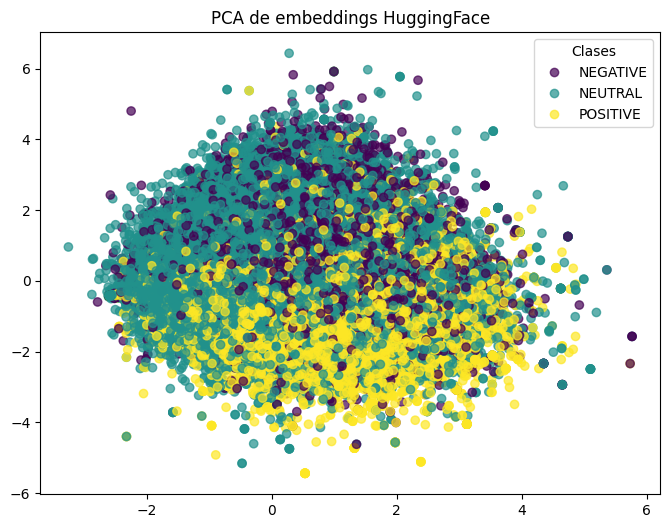

In [46]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)         # PCA(n_components=2) reduce tus vectores de alta dimensión (p. ej. 768 para BERT) a 2 dimensiones para poder graficarlas.
X_pca = pca.fit_transform(X_hf)   # X_hf son los embeddings de HuggingFace

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_hf, cmap="viridis", alpha=0.7)


# Obtenemos handles y labels del scatter
handles, _ = scatter.legend_elements()

# Creamos la leyenda usando los labels que quieras

plt.legend(handles, le.classes_, title="Clases")
# plt.legend(handles=scatter.legend_elements()[0], labels=le.classes_)
plt.title("PCA de embeddings HuggingFace")
plt.show()


Cada punto es un texto.

El color (c=y_hf) representa la clase (NEGATIVE, NEUTRAL, POSITIVE).

Observamos cómo separar las clases en las dos dimensiones principales.

In [47]:
# PCA componentes principales
# pca.components_ → vectores de carga de cada componente principal, indica qué features originales aportan más a cada componente.
print(pca.components_)  # shape: (2, n_features)


[[-0.06475793  0.08481761  0.01038054  0.07553279  0.07988336 -0.11672077
   0.06851362  0.1727995  -0.21608358 -0.05812216 -0.07721499 -0.20508239
  -0.02967395  0.05115991 -0.07693747 -0.02587911  0.00752139 -0.07180951
   0.08148076 -0.21801388  0.13053075  0.06768212  0.0654809  -0.05999448
   0.02203723 -0.01111396 -0.08400133  0.04667988 -0.16674925 -0.00585635
   0.16822354  0.03674161  0.03320512 -0.07054751  0.0316568   0.14523535
   0.06726198 -0.08844669 -0.14503582 -0.12290945  0.12108906 -0.18383108
  -0.13757573  0.10150896  0.1136177  -0.09327203 -0.05626971 -0.05954984
   0.03927832 -0.03441256  0.01401454 -0.16937621  0.11228333  0.08258235
  -0.05692833  0.08271445  0.11639428  0.02116062 -0.10081526  0.03908096
   0.08470341  0.00189974  0.02964859 -0.01300621 -0.12203734  0.14953291
  -0.01565099  0.15423748 -0.09643025  0.27171004 -0.05705263  0.08225316
   0.23478516  0.07682293  0.11574277 -0.06158276  0.00104257 -0.05480205
  -0.06794197  0.06690998 -0.13366946 

In [48]:
# pca.explained_variance_ratio_ → porcentaje de varianza que captura cada componente.
print(pca.explained_variance_ratio_)


[0.18841956 0.1364053 ]


Los dos primeros componentes principales explican aproximadamente el 32.48% de la varianza total de los datos.

#4 Parte II: Deep Learning con PyTorch RNN

##Modelo RNN con PyTorch

Embeddings promedio de BERT por texto (vectorized_text)

Etiquetas codificadas (sentimiento_encoded)

Una RNN simple o LSTM de 1 capa

Softmax para clasificación multiclase

In [49]:
# RNN básica entrenada sobre embeddings de BERT para 3 clases
# Paso 1: Preparar datos
import torch
from torch.utils.data import TensorDataset, DataLoader

# ya tenemos los embeddings
# X_hf = np.array(df['vectorized_text'].tolist())
# y_hf = df['sentimiento_encoded'].values

# X_train_hf, X_test_hf, y_train_hf, y_test_hf = train_test_split(
#     X_hf, y_hf, test_size=0.2, random_state=42
# )

# Convertimos a tensores
X_train_tensor = torch.tensor(X_train_hf, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_hf, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_hf, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_hf, dtype=torch.long)

# Creamos DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [50]:
# PAso 2: Definir una RNN simple (LSTM)

#Como los embeddings ya son vectores fijos por texto, podemos usar un LSTM de 1 capa que reciba esos vectores:
import torch.nn as nn

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # x: (batch_size, seq_len, input_size)
        # embeddings son vectores por documento (no secuencias), hacemos seq_len=1
        x = x.unsqueeze(1)           # (batch_size, 1, input_size)
        out, (hn, cn) = self.lstm(x)
        out = out[:, -1, :]           # Tomamos la última salida
        out = self.fc(out)
        return out

input_size = X_train_hf.shape[1]       # dimensión de los embeddings
hidden_size = 64
num_classes = 3

model_RNN_simple = SimpleRNN(input_size, hidden_size, num_classes)


In [51]:
# Paso 3: Entrenamiento
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_RNN_simple.parameters(), lr=1e-3)
num_epochs = 10

for epoch in range(num_epochs):
    model_RNN_simple.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_RNN_simple(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/10, Loss: 0.7890
Epoch 2/10, Loss: 0.7603
Epoch 3/10, Loss: 0.7516
Epoch 4/10, Loss: 0.7464
Epoch 5/10, Loss: 0.7416
Epoch 6/10, Loss: 0.7382
Epoch 7/10, Loss: 0.7351
Epoch 8/10, Loss: 0.7322
Epoch 9/10, Loss: 0.7296
Epoch 10/10, Loss: 0.7273


In [53]:
#Paso4 : evaluación simple

model_RNN_simple.eval()
y_pred_rnn_simple = []
y_true_rnn_simple = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_RNN_simple(X_batch)
        preds = torch.argmax(outputs, dim=1)
        y_pred_rnn_simple.extend(preds.numpy())
        y_true_rnn_simple.extend(y_batch.numpy())

acc = accuracy_score(y_true_rnn_simple, y_pred_rnn_simple)
print(f"Test Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_true_rnn_simple, y_pred_rnn_simple, target_names=le.classes_))

Test Accuracy: 0.6535

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.64      0.40      0.49     10001
     NEUTRAL       0.67      0.79      0.72     22265
    POSITIVE       0.62      0.61      0.61      9640

    accuracy                           0.65     41906
   macro avg       0.64      0.60      0.61     41906
weighted avg       0.65      0.65      0.64     41906



##Modelo RNN con PyTorch mejorada

Mejoras clave de esta versión:

Mayor capacidad gracias a 2 capas LSTM y más neuronas (hidden_size=128).

Dropout reduce overfitting.

Bidireccional ayuda a capturar dependencias de contexto de la secuencia.

Scheduler ajusta la tasa de aprendizaje a medida que el modelo converge.

In [54]:
# Mdelo mejorado

class ImprovedRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_layers=2, dropout=0.3, bidirectional=True):
        super(ImprovedRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional

        # LSTM con múltiples capas, bidireccional y dropout entre capas
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0,
            bidirectional=bidirectional
        )

        factor = 2 if bidirectional else 1
        self.fc = nn.Linear(hidden_size * factor, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = x.unsqueeze(1)  # Si los embeddings son vectores fijos, seq_len=1
        out, (hn, cn) = self.lstm(x)
        out = out[:, -1, :]  # Última salida
        out = self.dropout(out)
        out = self.fc(out)
        return out


In [57]:
#Inicializar modelo y optimizador
input_size = X_train_hf.shape[1]  # Dimensión de los embeddings
hidden_size = 128
num_classes = 3
num_layers = 2
dropout = 0.3
bidirectional = True

model_rnn_mejorada = ImprovedRNN(input_size, hidden_size, num_classes, num_layers, dropout, bidirectional)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_rnn_mejorada.parameters(), lr=1e-3)

# Scheduler para ajustar la tasa de aprendizaje
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


In [58]:
#Entrenamamiento
num_epochs = 15

for epoch in range(num_epochs):
    model_rnn_mejorada.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_rnn_mejorada(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    scheduler.step()  # Ajusta la tasa de aprendizaje
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, LR: {scheduler.get_last_lr()[0]:.6f}")


Epoch 1/15, Loss: 0.7898, LR: 0.001000
Epoch 2/15, Loss: 0.7660, LR: 0.001000
Epoch 3/15, Loss: 0.7581, LR: 0.001000
Epoch 4/15, Loss: 0.7519, LR: 0.001000
Epoch 5/15, Loss: 0.7485, LR: 0.000500
Epoch 6/15, Loss: 0.7381, LR: 0.000500
Epoch 7/15, Loss: 0.7351, LR: 0.000500
Epoch 8/15, Loss: 0.7328, LR: 0.000500
Epoch 9/15, Loss: 0.7309, LR: 0.000500
Epoch 10/15, Loss: 0.7288, LR: 0.000250
Epoch 11/15, Loss: 0.7234, LR: 0.000250
Epoch 12/15, Loss: 0.7215, LR: 0.000250
Epoch 13/15, Loss: 0.7202, LR: 0.000250
Epoch 14/15, Loss: 0.7207, LR: 0.000250
Epoch 15/15, Loss: 0.7182, LR: 0.000125


In [60]:
#Evaluación
model_rnn_mejorada.eval()
y_pred_rnn_mejorada = []
y_true_rnn_mejorada = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_rnn_mejorada(X_batch)
        preds = torch.argmax(outputs, dim=1)
        y_pred_rnn_mejorada.extend(preds.numpy())
        y_true_rnn_mejorada.extend(y_batch.numpy())

acc = accuracy_score(y_true_rnn_mejorada, y_pred_rnn_mejorada)
print(f"Test Accuracy: {acc:.4f}")
print(classification_report(y_true_rnn_mejorada, y_pred_rnn_mejorada))


Test Accuracy: 0.6623
              precision    recall  f1-score   support

           0       0.62      0.45      0.52     10001
           1       0.67      0.81      0.73     22265
           2       0.67      0.54      0.60      9640

    accuracy                           0.66     41906
   macro avg       0.65      0.60      0.62     41906
weighted avg       0.66      0.66      0.65     41906



# Comparación de modelos y conclusiones

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Función para calcular métricas weighted
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (weighted)": precision_score(y_true, y_pred, average="weighted"),
        "Recall (weighted)": recall_score(y_true, y_pred, average="weighted"),
        "F1-score (weighted)": f1_score(y_true, y_pred, average="weighted")
    }

# Calculamos métricas de cada modelo
metrics_logreg = get_metrics(y_test_hf, y_pred_hf)
metrics_rnn_simple = get_metrics(y_true_rnn_simple, y_pred_rnn_simple)
metrics_rnn_mejorada = get_metrics(y_true_rnn_mejorada, y_pred_rnn_mejorada)

# Creamos el DataFrame comparativo y redondeamos a 2 decimales
df_comparacion = pd.DataFrame({
    "Modelo": [
        "Logistic Regression (BERT)",
        "RNN simple (1 capa LSTM)",
        "RNN mejorada (2 capas + dropout)"
    ],
    "Accuracy": [
        round(metrics_logreg["Accuracy"], 2),
        round(metrics_rnn_simple["Accuracy"], 2),
        round(metrics_rnn_mejorada["Accuracy"], 2)
    ],
    "Precision (weighted)": [
        round(metrics_logreg["Precision (weighted)"], 2),
        round(metrics_rnn_simple["Precision (weighted)"], 2),
        round(metrics_rnn_mejorada["Precision (weighted)"], 2)
    ],
    "Recall (weighted)": [
        round(metrics_logreg["Recall (weighted)"], 2),
        round(metrics_rnn_simple["Recall (weighted)"], 2),
        round(metrics_rnn_mejorada["Recall (weighted)"], 2)
    ],
    "F1-score (weighted)": [
        round(metrics_logreg["F1-score (weighted)"], 2),
        round(metrics_rnn_simple["F1-score (weighted)"], 2),
        round(metrics_rnn_mejorada["F1-score (weighted)"], 2)
    ],
    "Observaciones": [
        "Baseline lineal; rendimiento más bajo",
        "Primera RNN básica; mejora sobre baseline",
        "RNN mejorada; más capacidad y regularización, ligera mejora"
    ]
})

# Mostramos el cuadro comparativo
print("Comparación de modelos y métricas obtenidas:\n")
display(df_comparacion)



Comparación de modelos y métricas obtenidas:



,Modelo,Accuracy,Precision (weighted),Recall (weighted),F1-score (weighted),Observaciones
0,Logistic Regression (BERT),0.62,0.62,0.62,0.61,Baseline lineal; rendimiento más bajo
1,RNN simple (1 capa LSTM),0.65,0.65,0.65,0.64,Primera RNN básica; mejora sobre baseline
2,RNN mejorada (2 capas + dropout),0.66,0.66,0.66,0.65,"RNN mejorada; más capacidad y regularización, ..."


Interpretación / Conclusión

Tendencia: A medida que el modelo se vuelve más complejo (RNN simple → RNN mejorada), se observa una ligera mejora en todas las métricas.

Logistic Regression: Sirve como baseline; captura patrones generales, pero no modela secuencias ni dependencias contextuales.

RNN simple: Introduce capacidad para captar relaciones temporales entre embeddings (aunque sean promedios de BERT).

RNN mejorada: Con más capas y regularización, logra un desempeño marginalmente superior y más estable.

Limite: Ninguno de los modelos supera el 70% de F1 o Accuracy, lo que indica que usar solo embeddings promedio tiene limitaciones para capturar matices finos de las noticias.

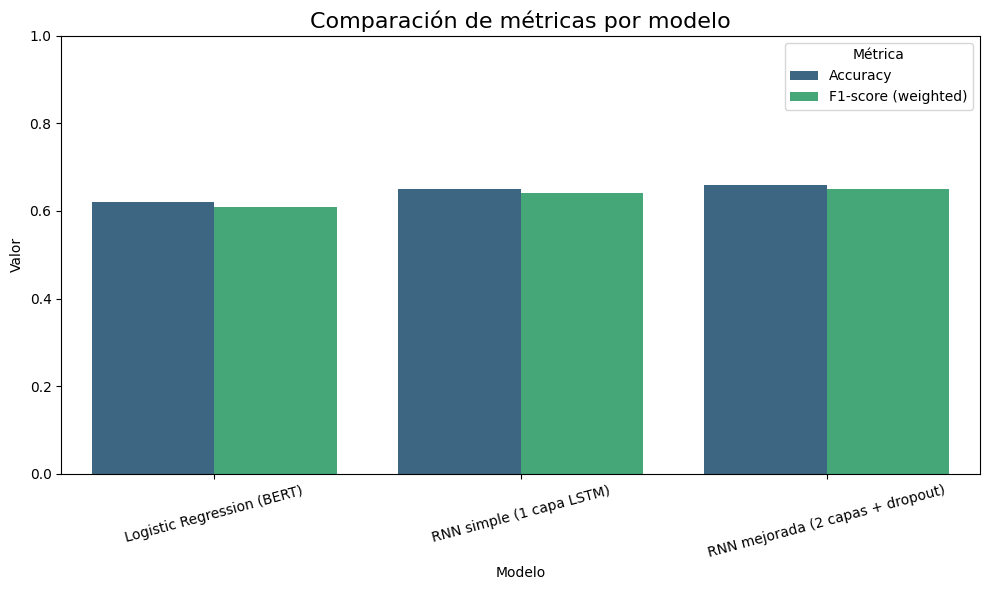

In [63]:
# gráfico comparación
df_grafico = df_comparacion.melt(
    id_vars="Modelo",
    value_vars=["Accuracy", "F1-score (weighted)"],
    var_name="Métrica",
    value_name="Valor"
)

plt.figure(figsize=(10,6))
sns.barplot(x="Modelo", y="Valor", hue="Métrica", data=df_grafico, palette="viridis")

plt.title("Comparación de métricas por modelo", fontsize=16)
plt.ylim(0, 1)  # Valores entre 0 y 1
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.legend(title="Métrica")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
